## CNN Trained for 800 epochs

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Allow image embeding in notebook
%matplotlib inline

In [2]:
from os.path import join

import os

# Tools to load, view and process images
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Used to build nets or layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# Pretrained models loaded in keras for transfer learning
from keras.applications import VGG16

from keras.models import Model

from keras import optimizers


import numpy as np

Using TensorFlow backend.


Load in the data, and give each image a label based on their directory

In [3]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels


# Load training and testing datasets.
ROOT_PATH = "traffic"
train_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Training")
test_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Testing")

images, labels = load_data(train_data_dir)

In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


Some EDA to display each image.

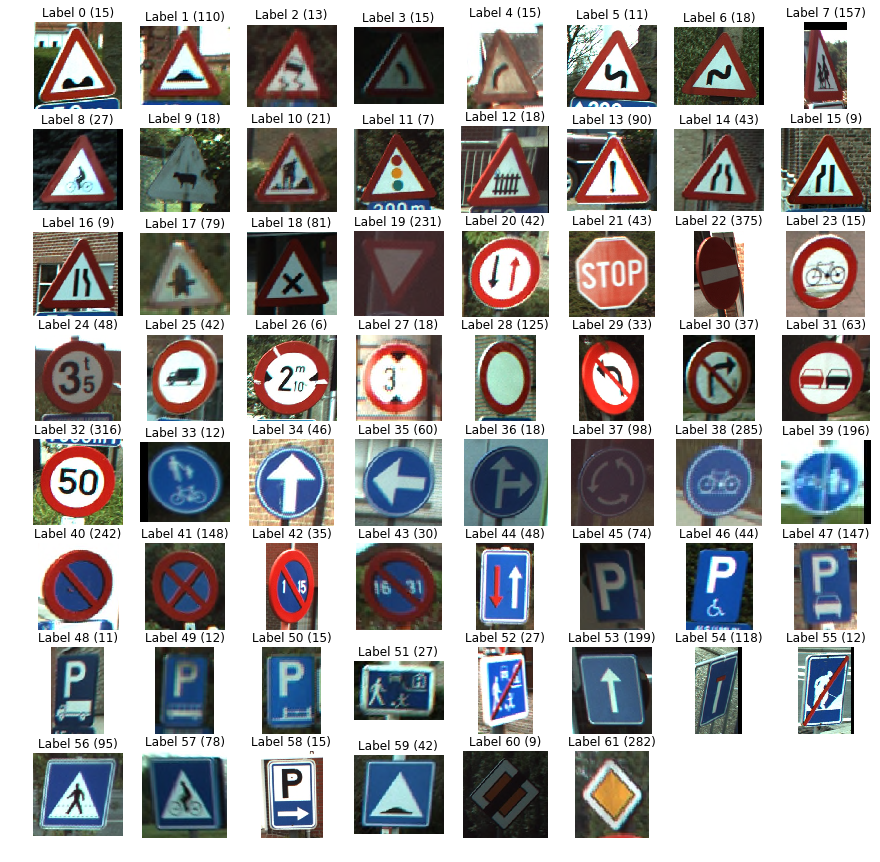

In [5]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

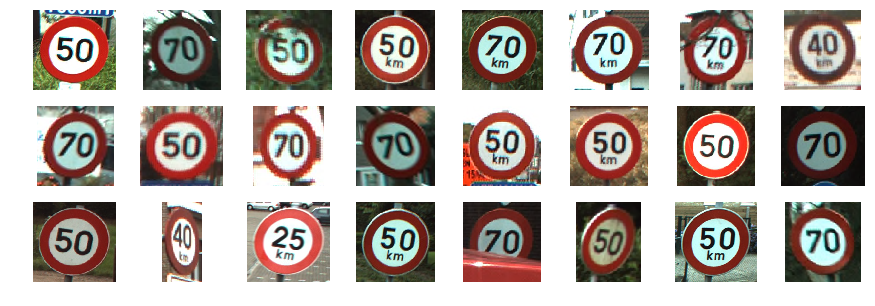

In [6]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 32)

## Keras CNN

Bellow is the code for the CNN it is the same as the 400 Epoch version, except it runs for 800 epochs. The loss and accuracy graphs from the 800 epoch iteration are better indicators than the graphs from the 400 epoch iteration.

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(62))
model.add(Activation('softmax'))

model.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),    
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


# model.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),    
#                 loss='categorical_crossentropy', 
#                 metrics=['accuracy'])

In [10]:
img_width = 32
img_height = 32
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling (we do not want to modify the testing data)
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    'traffic/datasets/BelgiumTS/Training',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    'traffic/datasets/BelgiumTS/Testing',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 4575 images belonging to 62 classes.
Found 2520 images belonging to 62 classes.


In [11]:
history = model.fit_generator(
    train_generator,
    epochs = 800,
    steps_per_epoch=143,
    validation_data=validation_generator,
    validation_steps=143)

Epoch 1/800
143/143 [==============================] - 6s 45ms/step - loss: 4.1316 - acc: 0.0140 - val_loss: 4.1267 - val_acc: 0.0256
Epoch 2/800
143/143 [==============================] - 4s 29ms/step - loss: 4.1219 - acc: 0.0205 - val_loss: 4.1181 - val_acc: 0.0327
Epoch 3/800
143/143 [==============================] - 4s 29ms/step - loss: 4.1125 - acc: 0.0280 - val_loss: 4.1102 - val_acc: 0.0322
Epoch 4/800
143/143 [==============================] - 4s 29ms/step - loss: 4.1064 - acc: 0.0321 - val_loss: 4.1023 - val_acc: 0.0377
Epoch 5/800
143/143 [==============================] - 4s 30ms/step - loss: 4.0987 - acc: 0.0341 - val_loss: 4.0944 - val_acc: 0.0526
Epoch 6/800
143/143 [==============================] - 4s 29ms/step - loss: 4.0935 - acc: 0.0361 - val_loss: 4.0868 - val_acc: 0.0803
Epoch 7/800
143/143 [==============================] - 4s 29ms/step - loss: 4.0873 - acc: 0.0490 - val_loss: 4.0773 - val_acc: 0.1191
Epoch 8/800
143/143 [==============================] - 4s 29ms

Epoch 62/800
143/143 [==============================] - 4s 29ms/step - loss: 2.9664 - acc: 0.3211 - val_loss: 2.8761 - val_acc: 0.4090
Epoch 63/800
143/143 [==============================] - 4s 30ms/step - loss: 2.9280 - acc: 0.3248 - val_loss: 2.7844 - val_acc: 0.4184
Epoch 64/800
143/143 [==============================] - 4s 29ms/step - loss: 2.8902 - acc: 0.3353 - val_loss: 2.7622 - val_acc: 0.4179
Epoch 65/800
143/143 [==============================] - 4s 29ms/step - loss: 2.8514 - acc: 0.3445 - val_loss: 2.7350 - val_acc: 0.4279
Epoch 66/800
143/143 [==============================] - 4s 29ms/step - loss: 2.8431 - acc: 0.3454 - val_loss: 2.6945 - val_acc: 0.4156
Epoch 67/800
143/143 [==============================] - 4s 29ms/step - loss: 2.8151 - acc: 0.3513 - val_loss: 2.6502 - val_acc: 0.4373
Epoch 68/800
143/143 [==============================] - 4s 29ms/step - loss: 2.7837 - acc: 0.3584 - val_loss: 2.6054 - val_acc: 0.4322
Epoch 69/800
143/143 [==============================] -

143/143 [==============================] - 4s 29ms/step - loss: 1.4145 - acc: 0.6295 - val_loss: 1.0770 - val_acc: 0.7261
Epoch 183/800
143/143 [==============================] - 4s 29ms/step - loss: 1.3644 - acc: 0.6434 - val_loss: 1.0386 - val_acc: 0.7149
Epoch 184/800
143/143 [==============================] - 4s 29ms/step - loss: 1.4007 - acc: 0.6371 - val_loss: 1.0236 - val_acc: 0.7224
Epoch 185/800
143/143 [==============================] - 4s 29ms/step - loss: 1.4066 - acc: 0.6302 - val_loss: 1.0166 - val_acc: 0.7207
Epoch 186/800
143/143 [==============================] - 4s 29ms/step - loss: 1.4001 - acc: 0.6312 - val_loss: 1.0531 - val_acc: 0.7064
Epoch 187/800
143/143 [==============================] - 4s 29ms/step - loss: 1.3890 - acc: 0.6426 - val_loss: 0.9984 - val_acc: 0.7252
Epoch 188/800
143/143 [==============================] - 4s 30ms/step - loss: 1.3619 - acc: 0.6450 - val_loss: 1.0034 - val_acc: 0.7305
Epoch 189/800
143/143 [==============================] - 4s 29

143/143 [==============================] - 4s 29ms/step - loss: 0.9472 - acc: 0.7321 - val_loss: 0.6824 - val_acc: 0.7954
Epoch 303/800
143/143 [==============================] - 4s 30ms/step - loss: 0.9231 - acc: 0.7344 - val_loss: 0.6437 - val_acc: 0.8101
Epoch 304/800
143/143 [==============================] - 4s 29ms/step - loss: 0.9469 - acc: 0.7320 - val_loss: 0.6806 - val_acc: 0.7998
Epoch 305/800
143/143 [==============================] - 4s 29ms/step - loss: 0.9230 - acc: 0.7338 - val_loss: 0.6683 - val_acc: 0.8004
Epoch 306/800
143/143 [==============================] - 4s 29ms/step - loss: 0.9342 - acc: 0.7377 - val_loss: 0.6587 - val_acc: 0.8150
Epoch 307/800
143/143 [==============================] - 4s 29ms/step - loss: 0.9375 - acc: 0.7324 - val_loss: 0.6434 - val_acc: 0.8118
Epoch 308/800
143/143 [==============================] - 4s 30ms/step - loss: 0.9255 - acc: 0.7384 - val_loss: 0.6764 - val_acc: 0.8092
Epoch 309/800
143/143 [==============================] - 4s 30

143/143 [==============================] - 4s 29ms/step - loss: 0.7286 - acc: 0.7816 - val_loss: 0.5367 - val_acc: 0.8310
Epoch 423/800
143/143 [==============================] - 4s 29ms/step - loss: 0.7574 - acc: 0.7744 - val_loss: 0.5021 - val_acc: 0.8493
Epoch 424/800
143/143 [==============================] - 4s 29ms/step - loss: 0.7311 - acc: 0.7823 - val_loss: 0.5364 - val_acc: 0.8395
Epoch 425/800
143/143 [==============================] - 4s 29ms/step - loss: 0.7222 - acc: 0.7897 - val_loss: 0.5171 - val_acc: 0.8414
Epoch 426/800
143/143 [==============================] - 4s 29ms/step - loss: 0.7204 - acc: 0.7834 - val_loss: 0.4765 - val_acc: 0.8601
Epoch 427/800
143/143 [==============================] - 4s 29ms/step - loss: 0.7126 - acc: 0.7827 - val_loss: 0.4892 - val_acc: 0.8614
Epoch 428/800
143/143 [==============================] - 4s 29ms/step - loss: 0.7369 - acc: 0.7817 - val_loss: 0.5032 - val_acc: 0.8511
Epoch 429/800
143/143 [==============================] - 4s 29

143/143 [==============================] - 4s 29ms/step - loss: 0.5995 - acc: 0.8153 - val_loss: 0.4300 - val_acc: 0.8763
Epoch 543/800
143/143 [==============================] - 4s 29ms/step - loss: 0.6061 - acc: 0.8138 - val_loss: 0.4566 - val_acc: 0.8662
Epoch 544/800
143/143 [==============================] - 4s 30ms/step - loss: 0.5802 - acc: 0.8094 - val_loss: 0.4285 - val_acc: 0.8785
Epoch 545/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5964 - acc: 0.8120 - val_loss: 0.4320 - val_acc: 0.8713
Epoch 546/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5971 - acc: 0.8142 - val_loss: 0.4478 - val_acc: 0.8708
Epoch 547/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5696 - acc: 0.8208 - val_loss: 0.4406 - val_acc: 0.8708
Epoch 548/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5889 - acc: 0.8118 - val_loss: 0.4186 - val_acc: 0.8798
Epoch 549/800
143/143 [==============================] - 4s 29

143/143 [==============================] - 4s 29ms/step - loss: 0.5260 - acc: 0.8335 - val_loss: 0.3940 - val_acc: 0.8873
Epoch 663/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5028 - acc: 0.8494 - val_loss: 0.3522 - val_acc: 0.8945
Epoch 664/800
143/143 [==============================] - 4s 30ms/step - loss: 0.5220 - acc: 0.8332 - val_loss: 0.3616 - val_acc: 0.8932
Epoch 665/800
143/143 [==============================] - 4s 29ms/step - loss: 0.4952 - acc: 0.8424 - val_loss: 0.3955 - val_acc: 0.8923
Epoch 666/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5214 - acc: 0.8396 - val_loss: 0.3853 - val_acc: 0.8853
Epoch 667/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5004 - acc: 0.8411 - val_loss: 0.3566 - val_acc: 0.8934
Epoch 668/800
143/143 [==============================] - 4s 29ms/step - loss: 0.5160 - acc: 0.8271 - val_loss: 0.3593 - val_acc: 0.8947
Epoch 669/800
143/143 [==============================] - 4s 29

143/143 [==============================] - 4s 29ms/step - loss: 0.4504 - acc: 0.8516 - val_loss: 0.3345 - val_acc: 0.9013
Epoch 783/800
143/143 [==============================] - 4s 29ms/step - loss: 0.4516 - acc: 0.8487 - val_loss: 0.3564 - val_acc: 0.8974
Epoch 784/800
143/143 [==============================] - 4s 29ms/step - loss: 0.4421 - acc: 0.8584 - val_loss: 0.3479 - val_acc: 0.9002
Epoch 785/800
143/143 [==============================] - 4s 28ms/step - loss: 0.4423 - acc: 0.8612 - val_loss: 0.3306 - val_acc: 0.9017
Epoch 786/800
143/143 [==============================] - 4s 29ms/step - loss: 0.4584 - acc: 0.8496 - val_loss: 0.3331 - val_acc: 0.9077
Epoch 787/800
143/143 [==============================] - 4s 29ms/step - loss: 0.4518 - acc: 0.8529 - val_loss: 0.3406 - val_acc: 0.9068
Epoch 788/800
143/143 [==============================] - 4s 29ms/step - loss: 0.4609 - acc: 0.8516 - val_loss: 0.3377 - val_acc: 0.8976
Epoch 789/800
143/143 [==============================] - 4s 29

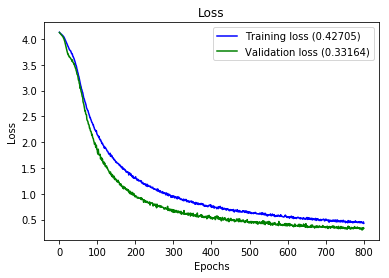

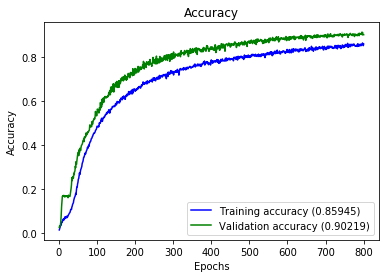

In [12]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)